<a href="https://colab.research.google.com/github/Anggarciaar/Proyecto_AnalisisGeoespacial/blob/main/Proyecto_AnalisisGeoespacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import os
base_dir="/content/drive/MyDrive/DATA_ProyectoAG"
print(base_dir)

/content/drive/MyDrive/DATA_ProyectoAG


# ***Librerias***


In [3]:
#Install the necessary packages
!pip install seaborn
!pip install contextily
!pip install pysal
!pip install osmnx
!pip install numpy==1.23.5
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [18]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd

import osmnx as ox

import pysal

import seaborn as sbn
import contextily as ctx
import matplotlib.pyplot as plt

In [6]:
import matplotlib.pyplot as plt
import rasterio


## ***CARGA DE DATOS***

# **1.Prueba con datos de Emisiones por departamento.**

In [7]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import geopandas as gpd
import pandas as pd

In [10]:
import pandas as pd
import numpy as np

In [11]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import geopandas as gpd

In [13]:
Departamentos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Emisiones_Departamento/EA_TCNCC_EN_100K_2016.shp")

In [14]:
Departamentos.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cod_depto   33 non-null     object  
 1   departamen  33 non-null     object  
 2   ems_nts_GE  33 non-null     float64 
 3   IPPC_energ  33 non-null     float64 
 4   IPPC_IPPU   33 non-null     float64 
 5   IPPC_AFOLU  33 non-null     float64 
 6   IPPC_resid  33 non-null     float64 
 7   sctr_fores  33 non-null     float64 
 8   sctr_indus  33 non-null     float64 
 9   sctr_agrop  33 non-null     float64 
 10  sctr_trans  33 non-null     float64 
 11  sctr_minas  33 non-null     float64 
 12  sctr_sanea  33 non-null     float64 
 13  sctr_resid  33 non-null     float64 
 14  sctr_comer  33 non-null     float64 
 15  area_ha     33 non-null     float64 
 16  SHAPE_Leng  33 non-null     float64 
 17  SHAPE_Area  33 non-null     float64 
 18  RULEID      33 non-null     int64   
 19  ge

In [15]:
Departamentos.head(32)

,cod_depto,departamen,ems_nts_GE,IPPC_energ,IPPC_IPPU,IPPC_AFOLU,IPPC_resid,sctr_fores,sctr_indus,sctr_agrop,sctr_trans,sctr_minas,sctr_sanea,sctr_resid,sctr_comer,area_ha,SHAPE_Leng,SHAPE_Area,RULEID,geometry
0,91,AMAZONAS,0.513058,83.027695,0.786040,422.302502,6.942034,404.831433,0.158128,19.845740,25.099117,0.0,6.942034,6.288620,0.434545,1.094979e+07,25.596483,8.877566,2,"POLYGON ((-69.43300 -1.06967, -69.43309 -1.070..."
1,05,ANTIOQUIA,12.946967,8793.464113,1350.703025,1236.964593,1565.835611,1444.536348,5247.494024,18.338103,3880.540778,0.0,1031.445886,599.901859,247.149863,6.296306e+06,21.109882,5.147846,6,"POLYGON ((-74.82915 8.19958, -74.82858 8.19945..."
2,81,ARAUCA,3.462820,244.463869,4.979072,3156.942814,56.434010,1694.365789,0.925160,1500.916424,39.772105,0.0,56.406601,21.701719,1.572121,2.382024e+06,8.987916,1.941630,3,"POLYGON ((-69.42759 6.10748, -69.42839 6.10742..."
3,08,ATLÁNTICO,7.341928,5506.572866,674.963450,497.446684,662.945224,157.551756,1629.713659,362.912386,1149.086209,0.0,486.964824,235.333159,114.212659,3.321987e+05,2.529379,0.274446,4,"POLYGON ((-74.85257 11.10548, -74.84393 11.072..."
4,13,BOLÍVAR,7.311540,2877.350050,1130.339006,2824.149233,479.701379,1436.953784,1527.318930,1445.815313,1117.092574,0.0,410.296608,191.124196,42.344982,2.669793e+06,14.975281,2.193822,4,"POLYGON ((-75.22236 10.79653, -75.22224 10.796..."
5,15,BOYACÁ,9.998332,5536.980714,1468.516781,2756.365356,236.469266,1200.349930,3096.423317,1677.745295,836.305070,0.0,211.914586,324.576061,43.155498,2.315195e+06,15.454153,1.889526,5,"POLYGON ((-72.04767 7.03830, -72.04681 7.03917..."
6,17,CALDAS,-0.533074,956.273150,39.084520,-1830.123625,301.691872,117.717776,349.585154,-1900.852581,498.331265,0.0,220.905235,128.098961,29.622734,7.438898e+05,6.521573,0.606614,1,"POLYGON ((-74.66030 5.76716, -74.65912 5.76428..."
7,18,CAQUETÁ,18.605941,279.808564,5.664958,18242.003860,78.463313,16305.834248,6.431997,1955.139095,195.049999,0.0,77.204294,60.128600,2.940459,9.010823e+06,21.306751,7.318908,6,"POLYGON ((-73.66003 1.61206, -73.66003 1.61206..."
8,85,CASANARE,9.443649,5496.804939,7.691213,3822.836208,116.316823,503.974694,15.188720,3373.298929,445.638812,0.0,108.783672,25.665734,10.991966,4.436293e+06,11.975771,3.612520,5,"POLYGON ((-72.33887 6.34575, -72.34114 6.34496..."
9,19,CAUCA,0.926403,1344.910817,26.237913,-749.209666,304.463452,1544.010173,832.741703,-2250.432836,341.502439,0.0,183.639232,238.287917,12.989494,3.124940e+06,13.769394,2.534944,2,"POLYGON ((-76.05335 3.21896, -76.05293 3.21847..."


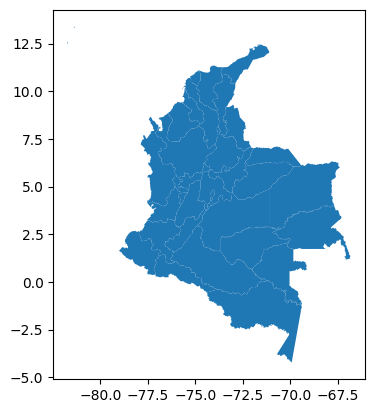

In [16]:
Departamentos.plot();

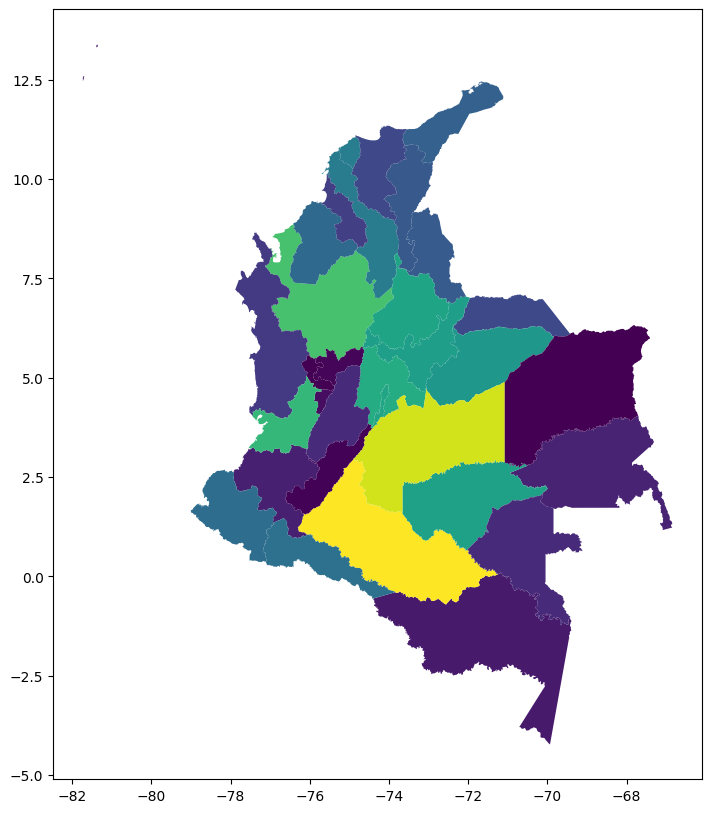

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Departamentos.plot(column='ems_nts_GE', ax=ax);

# **2.Cuencas sedimentarias de Colombia.**

In [19]:
import pandas as pd

In [20]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Data de división de cuencas sedimentarias en Colombia
Cuencas = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Cuencas_Sedimentarias/CUENCAS_AJUSTADAS_2010.shp")

In [22]:
SSJ = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Emisiones SSJ.shp")

In [23]:
print(SSJ)

   DPTO_CCDGO MPIO_CCDGO              MPIO_CNMBR                 MPIO_CRSLC  \
0          13        620          SAN CRISTÃBAL  ORD 36 DE FEBRERO DE 1996   
1          13        647          SAN ESTANISLAO                       1936   
2          13        654             SAN JACINTO                       1899   
3          13        657     SAN JUAN NEPOMUCENO                       1780   
4          13        673          SANTA CATALINA                       1772   
..        ...        ...                     ...                        ...   
81         70        713              SAN ONOFRE                       1899   
82         70        820       SANTIAGO DE TOLÃ                       1899   
83         70        823  SAN JOSÃ DE TOLUVIEJO                       1899   
84         70        473                  MORROA                       1855   
85        NaN        NaN                     NaN                        NaN   

     MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  S

In [24]:
Cuencas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID_CUENCA  24 non-null     int64   
 1   NOMBRE      24 non-null     object  
 2   AREA        24 non-null     float64 
 3   NMG         24 non-null     object  
 4   AÑO         24 non-null     int64   
 5   TIPO        23 non-null     object  
 6   TIPO_2      14 non-null     object  
 7   LOWYTF      24 non-null     int64   
 8   BASEYTF     24 non-null     int64   
 9   HIGHYTF     24 non-null     int64   
 10  R_PROBADAS  24 non-null     int64   
 11  R_PROBABLE  24 non-null     int64   
 12  R_POSIBLES  24 non-null     int64   
 13  FID_LIMITE  24 non-null     int64   
 14  ObjectID    24 non-null     int64   
 15  EntID       24 non-null     int64   
 16  geometry    24 non-null     geometry
dtypes: float64(1), geometry(1), int64(11), object(4)
memory usage: 3.3+ KB


In [25]:
#Tabla de datos
Cuencas.head(24)

,FID_CUENCA,NOMBRE,AREA,NMG,AÑO,TIPO,TIPO_2,LOWYTF,BASEYTF,HIGHYTF,R_PROBADAS,R_PROBABLE,R_POSIBLES,FID_LIMITE,ObjectID,EntID,geometry
0,3,GUAJIRA OFFSHORE,5.274678e+06,GUA OFF,2007,OFFSHORE,TRANSTENSIONAL MARGIN,226,350,1929,0,0,0,-1,0,0,"POLYGON Z ((1322674.118 1871541.442 0.000, 132..."
1,4,SINU OFFSHORE,2.947888e+06,SIN OFF,2007,OFFSHORE,ACCRETIONARY PRISM,0,50,784,0,0,0,-1,0,0,MULTIPOLYGON Z (((953422.143 1752659.478 0.000...
2,7,LOS CAYOS,1.445157e+07,CAY,2007,OFFSHORE,NaN,0,10,11,0,0,0,-1,0,0,"POLYGON Z ((443213.279 2287211.920 0.000, 4429..."
3,10,COLOMBIA,2.566933e+07,COL,2007,OFFSHORE,NaN,0,50,50,0,0,0,-1,0,0,"POLYGON Z ((1060075.900 1904657.708 0.000, 102..."
4,11,PACIFICO PROFUNDO COLOMBIANO,2.698517e+07,PAC PRF,2007,OFFSHORE,NaN,0,0,0,0,0,0,-1,0,0,"POLYGON Z ((292094.635 656338.951 0.000, -2248..."
5,15,CHOCO OFFSHORE,3.746078e+06,CHO OFF,2007,OFFSHORE,NaN,0,50,798,0,0,0,-1,0,0,"POLYGON Z ((579790.670 1291077.684 0.000, 5799..."
6,16,TUMACO OFFSHORE,3.232512e+06,TUM OFF,2007,OFFSHORE,NaN,0,50,618,0,0,0,-1,0,0,"POLYGON Z ((467989.621 655792.087 0.000, 29209..."
7,0,AMAGA,2.824929e+05,AMA,2007,FRONTERA,NaN,0,0,0,0,0,0,0,1,2,"POLYGON Z ((806478.855 1183302.583 0.000, 8057..."
8,1,AREA NO PROSPECTIVA,3.282873e+07,ANP,2007,NaN,NaN,0,0,0,0,0,0,0,1,2,MULTIPOLYGON Z (((1003508.374 1746889.414 0.00...
9,2,CAGUAN-PUTUMAYO,1.099493e+07,CAG PUT,2007,MADURA,FORELAND,255,300,955,57,128,51,0,1,2,"POLYGON Z ((1042217.870 741297.143 0.000, 1048..."


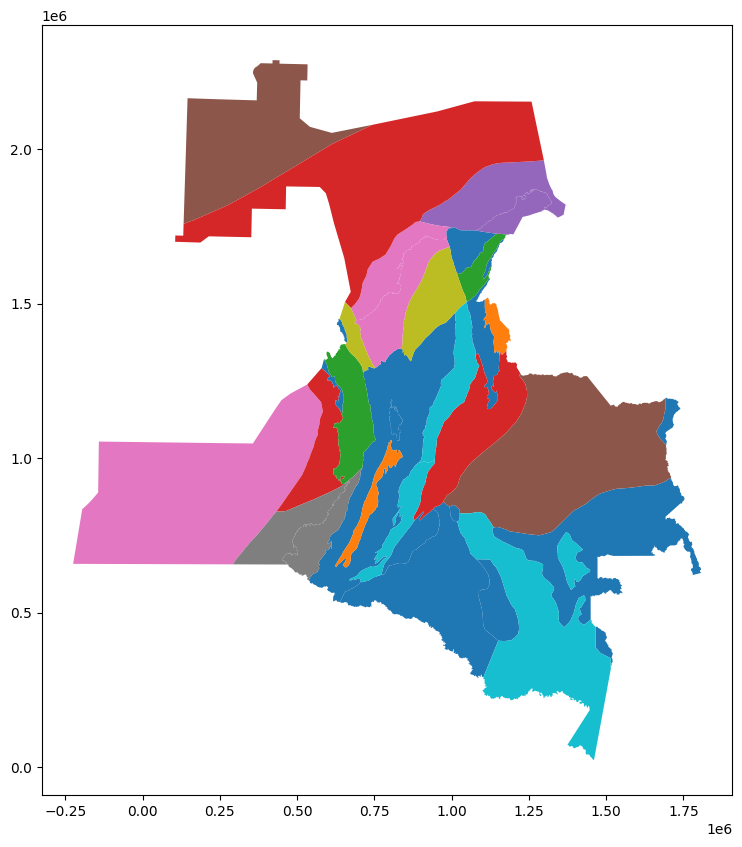

In [26]:
#Mapa de las cuencas
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Cuencas.plot(column='NOMBRE', ax=ax);

In [27]:
SSJ = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Sinu_SanJacinto.shp")

In [28]:
SSJ.head(4)

,FID_CUENCA,NOMBRE,AREA,NMG,AÑO,TIPO,TIPO_2,LOWYTF,BASEYTF,HIGHYTF,R_PROBADAS,R_PROBABLE,R_POSIBLES,FID_LIMITE,ObjectID,EntID,geometry
0,17,SINU-SAN JACINTO,3.974779e+06,SIN SJ,2007,FRONTERA,ACCRETIONARY PRISM,0,50,1011,0,0,262,0,1,2,"POLYGON Z ((917048.979 1719084.167 0.000, 9171..."


<Axes: >

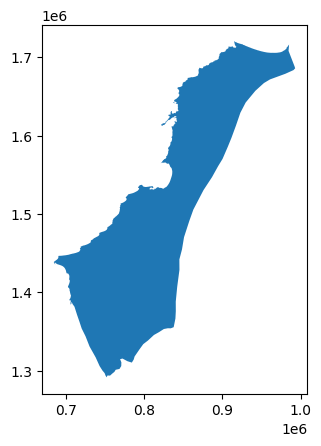

In [29]:
#Cuenca Sinu San Jacinto 
SSJ.plot()

# **3.Emisiones por ciudad**

In [30]:
import pandas as pd

In [31]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Data de emisiones por ciudad
Ciudades = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Emisiones SSJ.shp")

In [33]:
#Maxima y Minima emisión
max_emisiones = Ciudades['Emisiones'].max()
min_emisiones = Ciudades['Emisiones'].min()

print(max_emisiones)
print(min_emisiones)

4171.81
6.66


In [34]:
#Ciudades con mayores emisiones 
fila_max = Ciudades.loc[Ciudades['Emisiones'] == max_emisiones]

print(fila_max)

   DPTO_CCDGO MPIO_CCDGO    MPIO_CNMBR  \
39         08        001  BARRANQUILLA   
46         08        433       MALAMBO   
58         08        758       SOLEDAD   

                                           MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
39  Ordenanza 30 del 5 de Mayo de 1913 Ley 44 del ...  154.202079      08001   
46               Ordenanza 24 del 24 de Abril de 1912   97.942337      08433   
58                                               1813   59.358357      08758   

    MPIO_NANO  DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN     COD  Emisiones  \
39     2020.0  ATLÃNTICO    0.012753   0.814371  8001.0    4171.81   
46     2020.0  ATLÃNTICO    0.008097   0.499109  8433.0    4171.81   
58     2020.0  ATLÃNTICO    0.004908   0.420027  8758.0    4171.81   

    Emisiones2                                           geometry  
39     2507.02  MULTIPOLYGON (((913349.678 1713760.426, 913426...  
46     2507.02  POLYGON ((918604.160 1696305.952, 918613.208 1...  
58     2507.02  POLYG

In [35]:
Ciudades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  85 non-null     object  
 1   MPIO_CCDGO  85 non-null     object  
 2   MPIO_CNMBR  85 non-null     object  
 3   MPIO_CRSLC  85 non-null     object  
 4   MPIO_NAREA  85 non-null     float64 
 5   MPIO_CCNCT  85 non-null     object  
 6   MPIO_NANO   85 non-null     float64 
 7   DPTO_CNMBR  86 non-null     object  
 8   SHAPE_AREA  85 non-null     float64 
 9   SHAPE_LEN   85 non-null     float64 
 10  COD         85 non-null     float64 
 11  Emisiones   86 non-null     float64 
 12  Emisiones2  86 non-null     float64 
 13  geometry    86 non-null     geometry
dtypes: float64(7), geometry(1), object(6)
memory usage: 9.5+ KB


In [36]:
Ciudades.head(2)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,COD,Emisiones,Emisiones2,geometry
0,13,620,SAN CRISTÃBAL,ORD 36 DE FEBRERO DE 1996,42.268805,13620,2020.0,BOLÃVAR,0.003488,0.301725,13620.0,21.0211,15.3356,"POLYGON ((890666.098 1643146.065, 890671.003 1..."
1,13,647,SAN ESTANISLAO,1936,211.639257,13647,2020.0,BOLÃVAR,0.017465,0.715870,13647.0,21.0211,15.3356,"POLYGON ((880654.703 1647646.051, 880666.623 1..."


In [37]:
Ordenadoporemisiones=Ciudades.sort_values('Emisiones', ascending=False)

In [38]:
Ordenadoporemisiones.head(5)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,COD,Emisiones,Emisiones2,geometry
39,08,001,BARRANQUILLA,Ordenanza 30 del 5 de Mayo de 1913 Ley 44 del ...,154.202079,08001,2020.0,ATLÃNTICO,0.012753,0.814371,8001.0,4171.81,2507.02,"MULTIPOLYGON (((913349.678 1713760.426, 913426..."
58,08,758,SOLEDAD,1813,59.358357,08758,2020.0,ATLÃNTICO,0.004908,0.420027,8758.0,4171.81,2507.02,"POLYGON ((925318.566 1702142.495, 925340.342 1..."
46,08,433,MALAMBO,Ordenanza 24 del 24 de Abril de 1912,97.942337,08433,2020.0,ATLÃNTICO,0.008097,0.499109,8433.0,4171.81,2507.02,"POLYGON ((918604.160 1696305.952, 918613.208 1..."
70,13,442,MARÃA LA BAJA,Ley 119 del 14 de Septiembretiembre de 1936,559.917843,13442,2020.0,BOLÃVAR,0.046146,1.404783,13442.0,1869.52,1363.88,"POLYGON ((865212.388 1608065.176, 865235.068 1..."
62,13,001,CARTAGENA DE INDIAS,1599,597.681012,13001,2020.0,BOLÃVAR,0.049325,4.239567,13001.0,1869.52,1363.88,"MULTIPOLYGON (((840756.832 1617267.966, 840830..."


In [39]:
primeros_items = Ordenadoporemisiones.head(6)

In [40]:
#Las 6 ciudades con mayores emisiones dentro de la cuenca Sinu San Jacinto
primeros_items.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,COD,Emisiones,Emisiones2,geometry
39,08,001,BARRANQUILLA,Ordenanza 30 del 5 de Mayo de 1913 Ley 44 del ...,154.202079,08001,2020.0,ATLÃNTICO,0.012753,0.814371,8001.0,4171.81,2507.02,"MULTIPOLYGON (((913349.678 1713760.426, 913426..."
58,08,758,SOLEDAD,1813,59.358357,08758,2020.0,ATLÃNTICO,0.004908,0.420027,8758.0,4171.81,2507.02,"POLYGON ((925318.566 1702142.495, 925340.342 1..."
46,08,433,MALAMBO,Ordenanza 24 del 24 de Abril de 1912,97.942337,08433,2020.0,ATLÃNTICO,0.008097,0.499109,8433.0,4171.81,2507.02,"POLYGON ((918604.160 1696305.952, 918613.208 1..."
70,13,442,MARÃA LA BAJA,Ley 119 del 14 de Septiembretiembre de 1936,559.917843,13442,2020.0,BOLÃVAR,0.046146,1.404783,13442.0,1869.52,1363.88,"POLYGON ((865212.388 1608065.176, 865235.068 1..."
62,13,001,CARTAGENA DE INDIAS,1599,597.681012,13001,2020.0,BOLÃVAR,0.049325,4.239567,13001.0,1869.52,1363.88,"MULTIPOLYGON (((840756.832 1617267.966, 840830..."


In [41]:
data_nuevo = Ordenadoporemisiones.loc[:, ["MPIO_CNMBR", "Emisiones"]]

In [42]:
data_nuevo.head(6)

,MPIO_CNMBR,Emisiones
39,BARRANQUILLA,4171.81
58,SOLEDAD,4171.81
46,MALAMBO,4171.81
70,MARÃA LA BAJA,1869.52
62,CARTAGENA DE INDIAS,1869.52
67,EL CARMEN DE BOLÃVAR,1869.52


In [43]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

<ipython-input-45-e3d7b21ea6a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Tabla = sns.distplot(Ciudades['Emisiones'], kde=False)


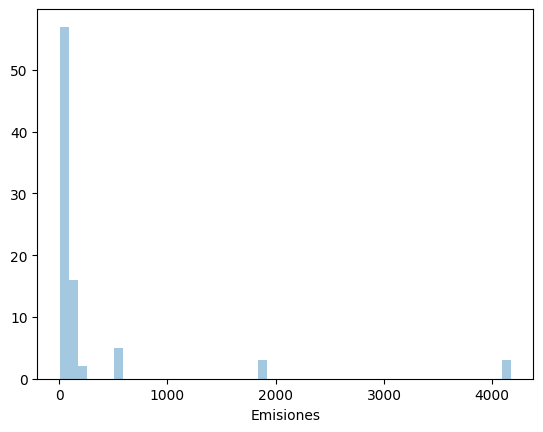

In [45]:
#Histograma de Emisiones por ciudad
import seaborn as sns
Tabla = sns.distplot(Ciudades['Emisiones'], kde=False)


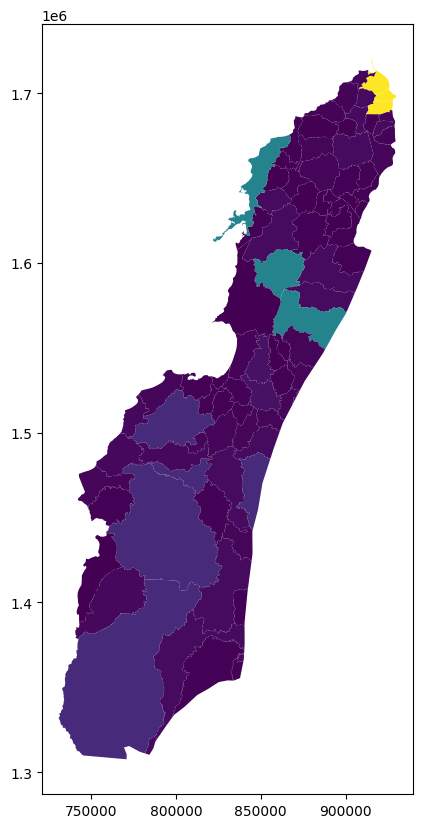

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Ciudades.plot(column='Emisiones', ax=ax);

<ipython-input-47-a971bfcdbf0d>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


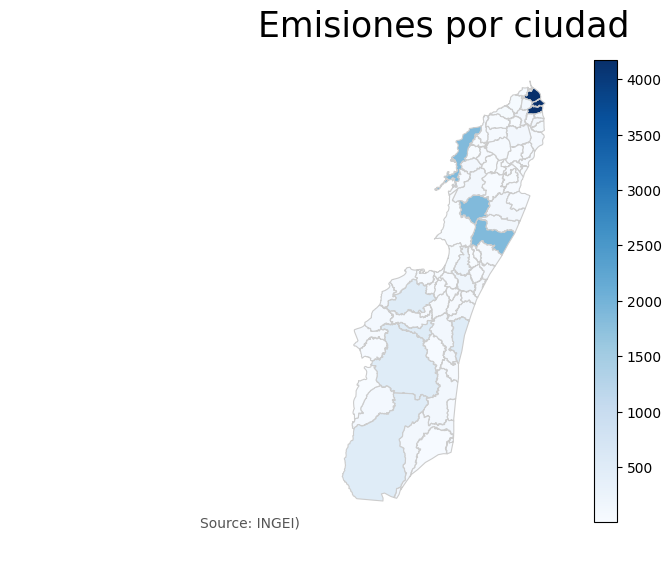

In [47]:
#Mapa de emisiones por ciudades
vmin, vmax = 6.66, 4171.81
fig, ax = plt.subplots(1, figsize=(10, 6))
Ciudades.plot(column="Emisiones", cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Emisiones por ciudad', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
ax.annotate('Source: INGEI)',
           xy=(0.2, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/MapadeEmisiones.png', dpi=300)

In [48]:
import matplotlib.pyplot as plt

In [49]:
#centroide de las ciudades con mayores emisiones
Centro=primeros_items.centroid
Centro.head(6)

39    POINT (918139.810 1705885.892)
58    POINT (923372.659 1698024.823)
46    POINT (920323.005 1691547.579)
70    POINT (861142.569 1595235.094)
62    POINT (848811.538 1649315.113)
67    POINT (877121.713 1566798.039)
dtype: geometry

In [50]:
import pandas as pd

# Crear un DataFrame a partir de la columna "Centro"
df_centro = pd.DataFrame(Centro.geometry)

# Imprimir los primeros registros del DataFrame "df_centro"
print(df_centro.head())


                                 0
39  POINT (918139.810 1705885.892)
58  POINT (923372.659 1698024.823)
46  POINT (920323.005 1691547.579)
70  POINT (861142.569 1595235.094)
62  POINT (848811.538 1649315.113)


In [51]:
from shapely.geometry import Point
geometria=[Point(918139.810,1705885.892), Point(923372.659,1698024.823), Point(920323.005,1691547.579),Point(861142.569,1595235.094),Point(848811.538,1649315.113),Point(877121.713,1566798.039)]


In [52]:
gdf = gpd.GeoDataFrame(df_centro, geometry=geometria)

<Axes: >

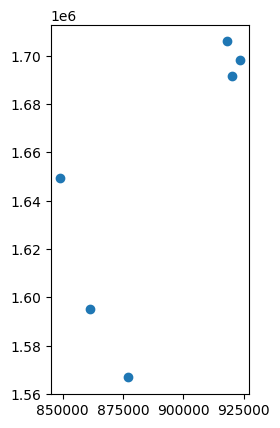

In [53]:
Centro.plot()

In [54]:
cents =primeros_items.centroid
cents.head()

39    POINT (918139.810 1705885.892)
58    POINT (923372.659 1698024.823)
46    POINT (920323.005 1691547.579)
70    POINT (861142.569 1595235.094)
62    POINT (848811.538 1649315.113)
dtype: geometry

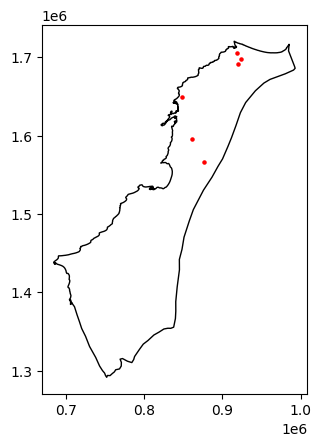

In [55]:
fig, ax = plt.subplots()
SSJ.plot(ax=ax, facecolor='none', edgecolor='black')
puntos_dentro = cents.within(SSJ.geometry.iloc[0])  # Filtrar puntos dentro del polígono
cents[puntos_dentro].plot(ax=ax, color='red', markersize=5)
plt.show()


fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/centroides.png', dpi=300)

In [56]:
pip install descarteslabs[complete]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.4/969.4 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [57]:
import geopandas as gpd

In [58]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import matplotlib.pyplot as plt

In [60]:
import geopandas as gpd
from shapely.geometry import Polygon

In [61]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [62]:
# Extraer las coordenadas x e y del GeoDataFrame
x_coords = gdf.geometry.x
y_coords = gdf.geometry.y

# Crear un array de coordenadas
coords = np.column_stack((x_coords, y_coords))

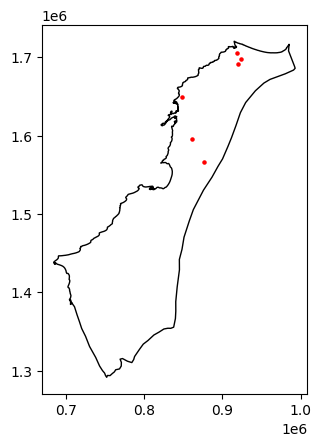

In [63]:
fig, ax = plt.subplots()
SSJ.plot(ax=ax, facecolor='none', edgecolor='black')
puntos_dentro = cents.within(SSJ.geometry.iloc[0]) 
 # Filtrar puntos dentro del polígono
cents[puntos_dentro].plot(ax=ax, color='red', markersize=5)
plt.show()




In [64]:
pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
descarteslabs 1.12.1 requires numpy<1.23.0,>=1.21.6, but you have numpy 1.24.3 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
osmnx 1.3.1.post0 requires Shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


# **4.BANCO DE INFORMACIÓN DE LA ANH**

# ***POZOS***

In [72]:
import pandas as pd

In [73]:
import geopandas as gpd

In [74]:
Pozos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozos_.shp")

In [75]:
Pozos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         290 non-null    int64   
 1   UWI         290 non-null    object  
 2   WELL_NAME   290 non-null    object  
 3   WELL_COUNT  290 non-null    object  
 4   DEPARTAMEN  290 non-null    object  
 5   WELL_COU_1  290 non-null    object  
 6   FIELD_ABRE  286 non-null    object  
 7   GEOLOGIC_P  290 non-null    object  
 8   CONTRATO    290 non-null    object  
 9   WELL_LONGI  290 non-null    float64 
 10  WELL_LATIT  290 non-null    float64 
 11  WELL_CLA_1  202 non-null    object  
 12  WELL_STA_1  284 non-null    object  
 13  WELLTYPE    174 non-null    object  
 14  OPERATOR_W  290 non-null    object  
 15  COMPANY_CO  290 non-null    object  
 16  PLATO       0 non-null      float64 
 17  geometry    290 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), obje

In [76]:
Pozos.head(2)

,FID,UWI,WELL_NAME,WELL_COUNT,DEPARTAMEN,WELL_COU_1,FIELD_ABRE,GEOLOGIC_P,CONTRATO,WELL_LONGI,WELL_LATIT,WELL_CLA_1,WELL_STA_1,WELLTYPE,OPERATOR_W,COMPANY_CO,PLATO,geometry
0,104,ARRE0007P,P-7 ARROYO ARENA,COLOMBIA,BOLIVAR,EL CARMEN DE BOLIVAR,SAMAN,SINU-SAN JACINTO,SAMAN,-75.160033,9.725972,A3,SIN ESTADO,VERTICAL,HOCOL S.A.,HOCOL S.A.,NaN,POINT Z (881207.812 1567502.625 1640.490)
1,173,SANS0002,SAN SEBASTIAN-2,COLOMBIA,CORDOBA,SAN ANTERO,SN 6,SINU-SAN JACINTO,PENDIENTE,-75.773934,9.300281,A3,TAPONADO Y ABANDONADO,VERTICAL,SOCONY VACUUM OIL COMPANY OF COLOMBIA,AGENCIA NACIONAL DE HIDROCARBUROS,NaN,POINT Z (813594.813 1520675.625 2194.000)


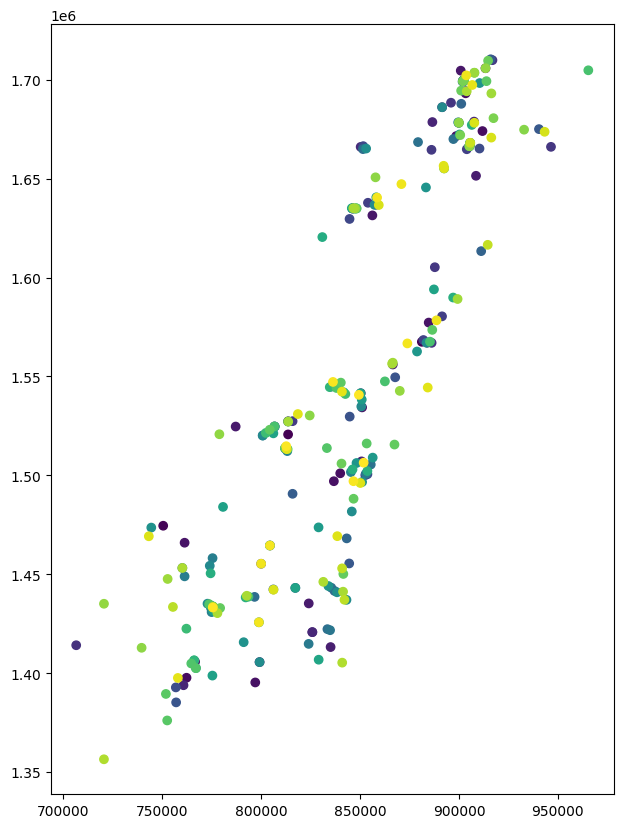

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Pozos.plot(column='FID', ax=ax);

In [78]:
appending = SSJ.geometry.append(Pozos.geometry)
appending.sample(290)

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:622: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = getattr(super(), mtd)(*args, **kwargs)


235    POINT Z (720508.625 1435065.625 12262.000)
16      POINT Z (836733.875 1497025.625 3775.000)
40         POINT Z (825853.000 1420722.000 0.000)
224     POINT Z (900620.203 1671996.844 8665.000)
43      POINT Z (775341.375 1433524.500 6938.000)
                          ...                    
275    POINT Z (906707.313 1697347.875 11694.900)
254      POINT Z (755372.125 1433460.000 745.000)
125      POINT Z (800771.875 1520134.250 487.000)
207     POINT Z (886484.750 1573533.375 4615.000)
64      POINT Z (902246.000 1699780.000 2400.000)
Name: geometry, Length: 290, dtype: geometry

# **Tendencia de los Pozos**

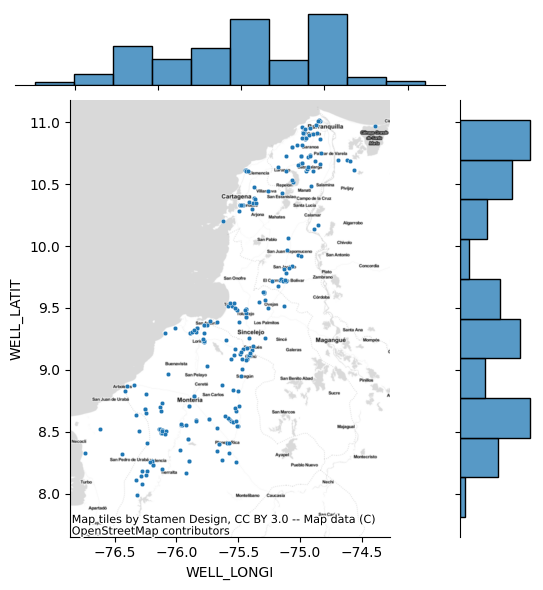

In [79]:
#Let's plot the distribution of the point pattern
data_scatter = sbn.jointplot(x='WELL_LONGI',
                             y='WELL_LATIT',
                             data=Pozos,
                             s=10.5)

ctx.add_basemap(data_scatter.ax_joint,
                crs='EPSG:4326',
                source=ctx.providers.Stamen.TonerLite)

fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/TENDENCIApozos.png', dpi=300)

In [80]:
pip install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
descarteslabs 1.12.1 requires numpy<1.23.0,>=1.21.6, but you have numpy 1.23.5 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.3.1.post0 requires Shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.


# *Dispersión de los pozos**




In [81]:
pip install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
#Then, compute the important parameters of the deviation ellipse

#Standard distance

#std_d = centrography.std_distance(Pozos[['WELL_LONGI', 'WELL_LATIT']])

#std_d

In [83]:
#major, minor, rotation = centrography.ellipse(Pozos[['WELL_LONGI', 'WELL_LATIT']])

NameError: ignored

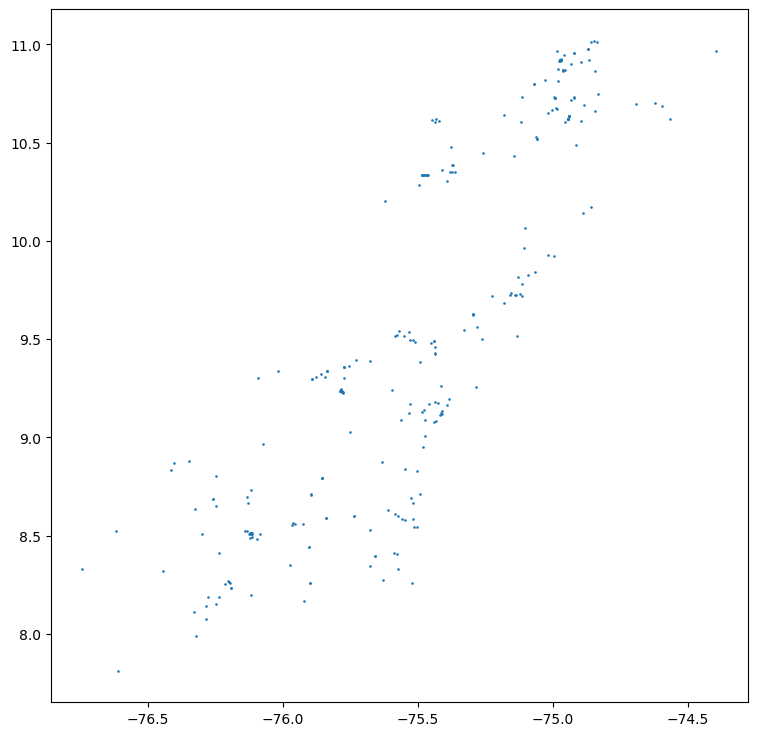

In [84]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(Pozos['WELL_LONGI'], Pozos['WELL_LATIT'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron
)

# **Kernel Density Estimation_Pozos**

In [85]:
import matplotlib.pyplot as plt

In [86]:

import seaborn as sbn

In [87]:
import geopandas as gpd

In [88]:
import contextily as ctx

In [89]:
limites=SSJ.geometry.total_bounds

In [90]:
#gdf = gpd.read_file(.shp')'/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Emisiones SSJ

In [91]:
#bounds = gdf.total_bounds

In [92]:
print(Pozos.crs)

EPSG:3116


<ipython-input-121-95c628749732>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(
/usr/local/lib/python3.10/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


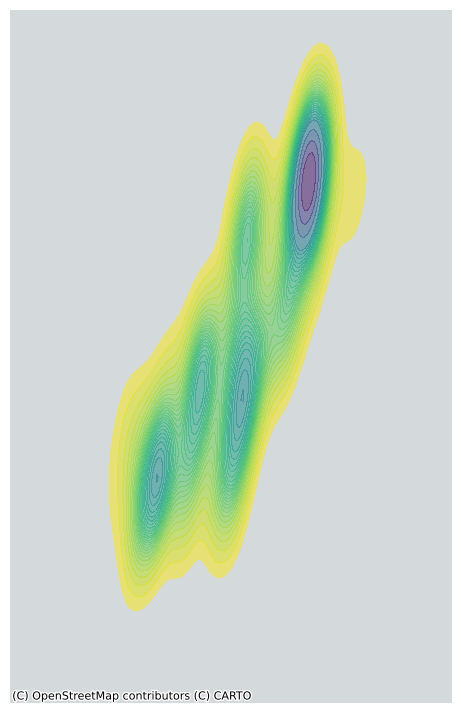

In [121]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sbn.kdeplot(
    x=Pozos['WELL_LONGI'],
    y=Pozos['WELL_LATIT'],
    n_levels=30, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
ctx.add_basemap(ax=ax,crs=Pozos.crs.to_string(),
    source=ctx.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozos_kde.png')

### ***SISMICA 2D***

In [94]:
Sismica = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Puntos_lineas2D.shp")

In [95]:
Sismica.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   org_fid   2085 non-null   int64   
 1   distance  2085 non-null   float64 
 2   X         2085 non-null   float64 
 3   Y         2085 non-null   float64 
 4   geometry  2085 non-null   geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 81.6 KB


In [96]:
Sismica.head(2)

,org_fid,distance,X,Y,geometry
0,1,0.0,771591.290,1470255.942,POINT (771591.290 1470255.942)
1,1,8000.0,779326.039,1468608.607,POINT (779326.039 1468608.607)


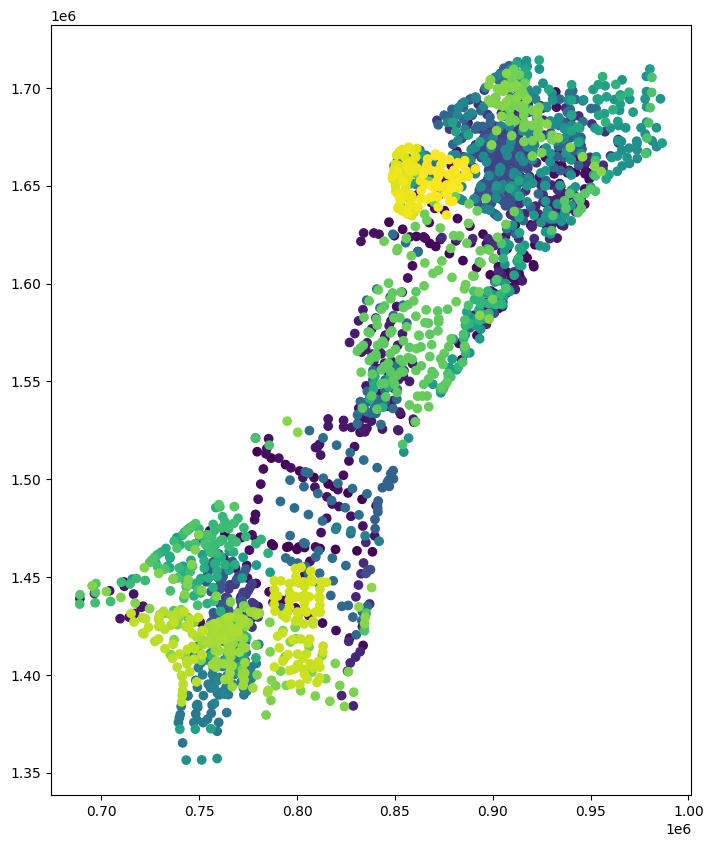

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Sismica.plot(column='org_fid', ax=ax);
plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Puntos_lineas2Ddistribución.png')

## **Tendencia de las lineas sismicas 2D**

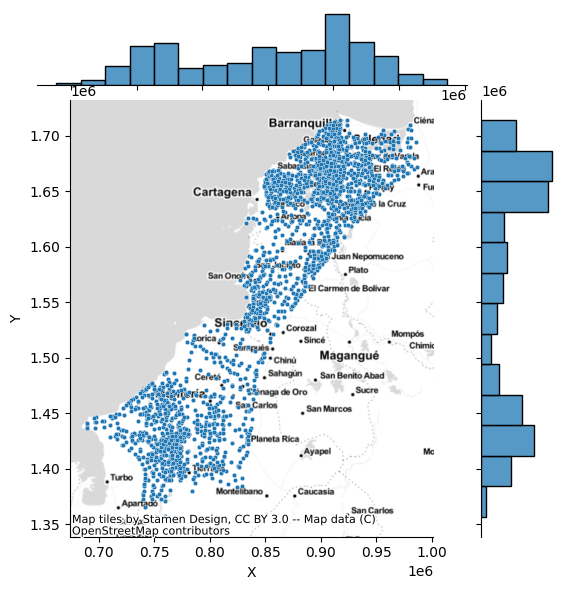

In [98]:
#Let's plot the distribution of the point pattern
data_scatter = sbn.jointplot(x='X',
                             y='Y',
                             data=Sismica,
                             s=10.5)

ctx.add_basemap(data_scatter.ax_joint,
                crs='EPSG:3116',
                source=ctx.providers.Stamen.TonerLite)

fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/distribucionsimica2d.png', dpi=300)

# **Kernel density estimation_lineas sismicas 2D**

<ipython-input-117-a7b58f75adb8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(


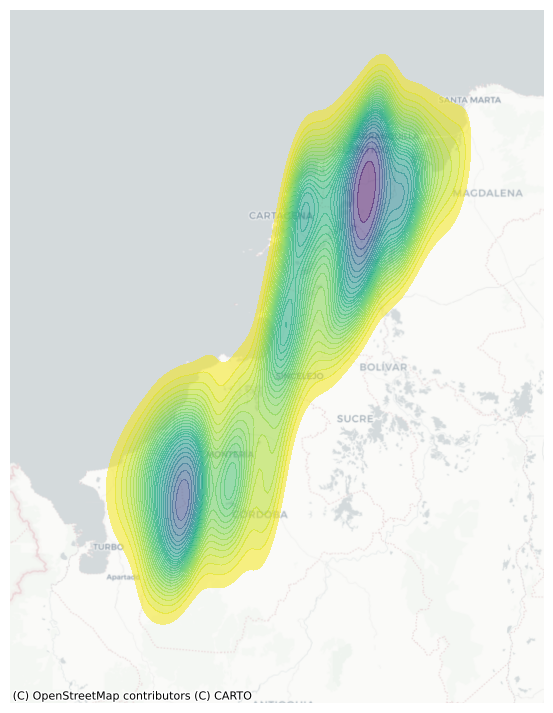

In [117]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sbn.kdeplot(
    x=Sismica['X'],
    y=Sismica['Y'],
    n_levels=30, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
ctx.add_basemap(ax=ax,crs=Sismica.crs.to_string(),
    source=ctx.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Lineas2D_kde.png')

### ***SISMICA 3D***

In [100]:
Cubosismico = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/SISMICA3D.shp")

In [101]:
Cubosismico.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1 non-null      int64   
 1   CONTRATO    1 non-null      object  
 2   AREA_KM2    1 non-null      float64 
 3   NOMBRE      1 non-null      object  
 4   COMPANY_OP  1 non-null      object  
 5   CUENCA_GEO  1 non-null      object  
 6   COMP_SERVI  1 non-null      object  
 7   FECHA_ADQU  1 non-null      object  
 8   XMIN        1 non-null      float64 
 9   XMAX        1 non-null      float64 
 10  YMIN        1 non-null      float64 
 11  YMAX        1 non-null      float64 
 12  SHAPE_Leng  1 non-null      float64 
 13  SHAPE_Area  1 non-null      float64 
 14  geometry    1 non-null      geometry
dtypes: float64(7), geometry(1), int64(1), object(6)
memory usage: 248.0+ bytes


In [102]:
Cubosismico.head(2)

,FID,CONTRATO,AREA_KM2,NOMBRE,COMPANY_OP,CUENCA_GEO,COMP_SERVI,FECHA_ADQU,XMIN,XMAX,YMIN,YMAX,SHAPE_Leng,SHAPE_Area,geometry
0,80,SSJN-01,299.839584,SSJN1 3D-2010,LEWIS ENERGY COLOMBIA INC,SINU-SAN JACINTO,SISMOPETROL SAS,1900-01-01,-75.026992,-74.807267,10.535074,10.726609,80345.005075,0.024769,"POLYGON ((908059.791 1674776.693, 908361.417 1..."


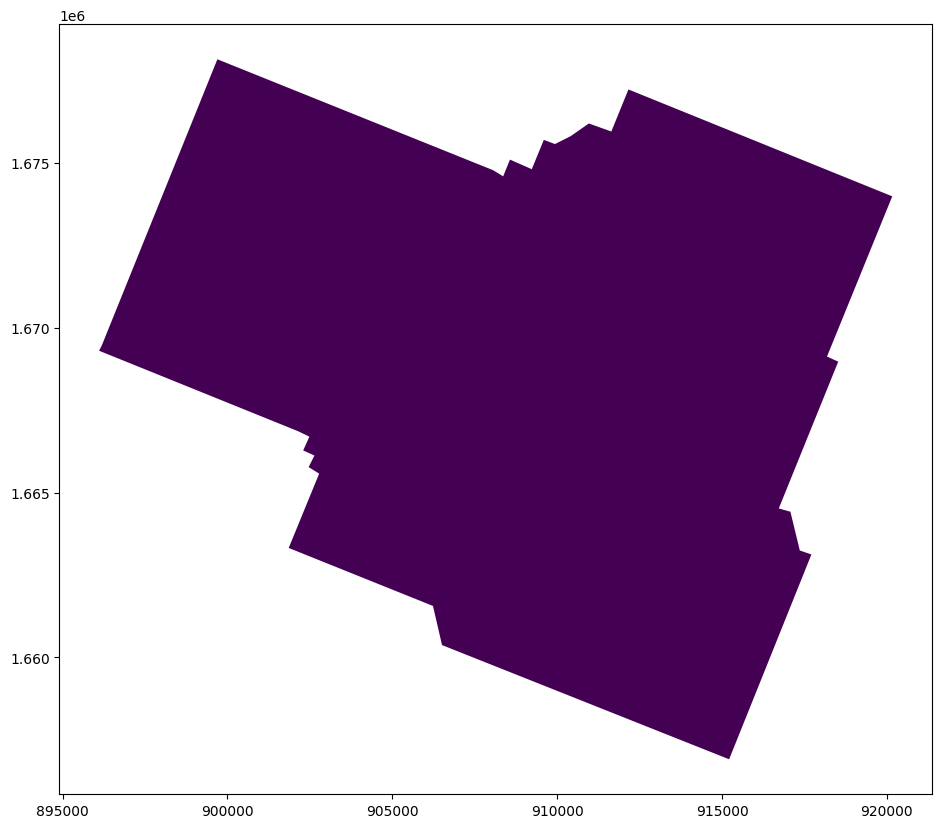

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
Cubosismico.plot(column='FID', ax=ax);

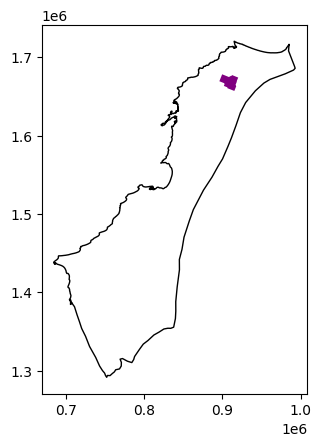

In [104]:
fig, ax = plt.subplots()
SSJ.plot(ax=ax, facecolor='none', edgecolor='black')
puntos_dentro = Cubosismico.within(SSJ.geometry.iloc[0])  # Filtrar puntos dentro del polígono
Cubosismico[puntos_dentro].plot(ax=ax, color='purple', markersize=5)
plt.show()


fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/cubosiss.png', dpi=300)

## ***VOLCANES***

In [105]:
VOLCANES= gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Volcan.shp")

In [106]:
VOLCANES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        8 non-null      int64   
 1   X         8 non-null      int64   
 2   Y         8 non-null      int64   
 3   geometry  8 non-null      geometry
dtypes: geometry(1), int64(3)
memory usage: 384.0 bytes


In [107]:
VOLCANES.head(2)

,id,X,Y,geometry
0,1,871162,1685473,POINT (871162.292 1685472.869)
1,2,872581,1679998,POINT (872581.220 1679997.739)


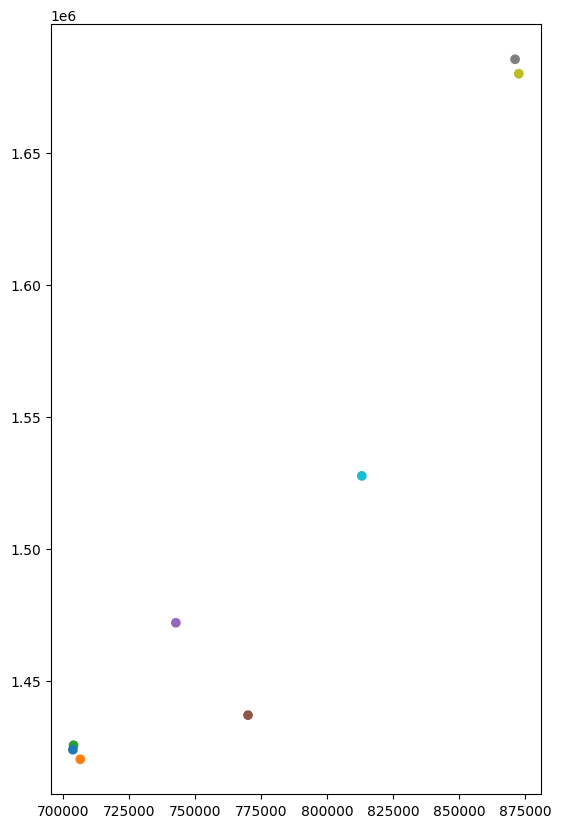

In [108]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
VOLCANES.plot(column='geometry', ax=ax);

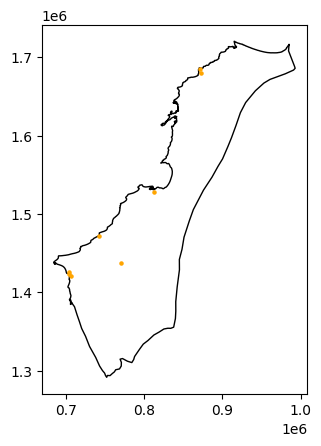

In [109]:
fig, ax = plt.subplots()
SSJ.plot(ax=ax, facecolor='none', edgecolor='black')
puntos_dentro = VOLCANES.within(SSJ.geometry.iloc[0])  # Filtrar puntos dentro del polígono
VOLCANES[puntos_dentro].plot(ax=ax, color='orange', markersize=5)
plt.show()


fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/VOLCANEs.png', dpi=300)

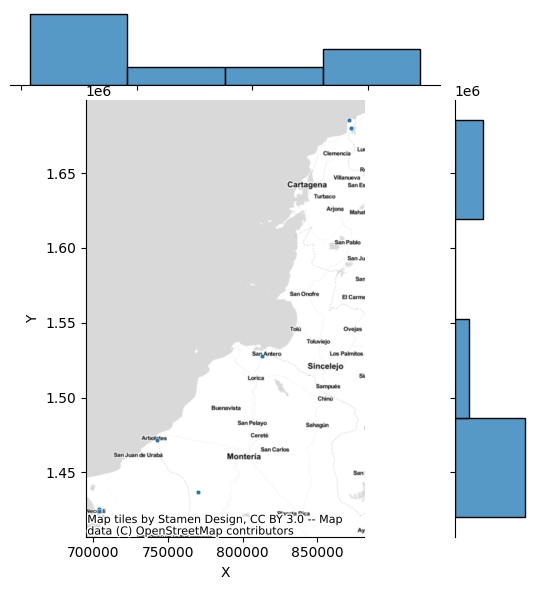

In [110]:
#Let's plot the distribution of the point pattern
data_scatter = sbn.jointplot(x='X',
                             y='Y',
                             data=VOLCANES,
                             s=10.5)

ctx.add_basemap(data_scatter.ax_joint,
                crs='EPSG:3116',
                source=ctx.providers.Stamen.TonerLite)

fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/distribucionsimica2d.png', dpi=300)

<ipython-input-116-054e3502913f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(


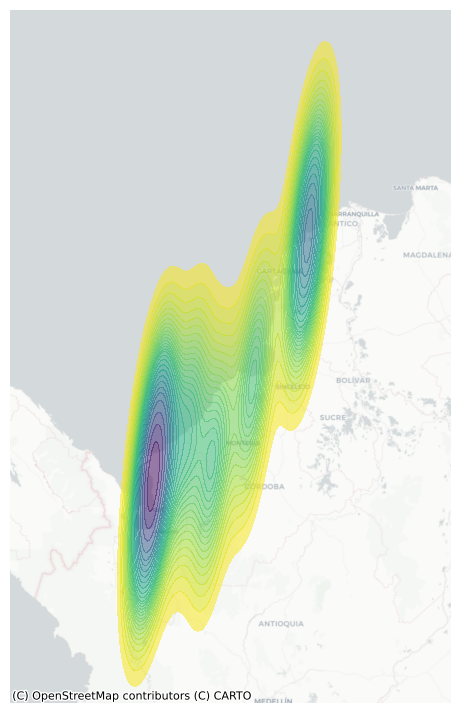

In [116]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sbn.kdeplot(
    x=VOLCANES['X'],
    y=VOLCANES['Y'],
    n_levels=30, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
ctx.add_basemap(ax=ax,crs=VOLCANES.crs.to_string(),
    source=ctx.providers.CartoDB.Positron
)

# Remove axes
ax.set_axis_off()

plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/VOLCANES_kde.png')

## **COORDENADAS DEL PROYECTO**

In [ ]:
print(Pozos.crs)

In [ ]:
print(Sismica.crs)

In [ ]:
print(Cubosismico.crs)

In [ ]:
print(VOLCANES.crs)

In [ ]:
print(Ciudades.crs)

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))
Pozos.plot(ax=axs[0])
Sismica.plot(ax=axs[1]);

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
appending.plot(ax=ax)
Cubosismico.plot(ax=ax, color='purple')
Pozos.plot(ax=ax, color='red') 
Sismica.plot(ax=ax, color='white')
fig.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Datatotal.png', dpi=300)